In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# 1. Загрузка данных
train_path = r"D:\\Эстер\\с рс\\Courses\\ML Engineer\\HWEster17\\archive\\train_dataset.csv"
test_path = r"D:\\Эстер\\с рс\\Courses\\ML Engineer\\HWEster17\\archive\\test_dataset.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)


In [4]:
# 2. EDA - Анализ данных
# Подсчет пропусков и статистических характеристик
eda_stats = df_train.describe().T
eda_stats["missing_ratio"] = df_train.isnull().sum() / len(df_train)
eda_stats["variance"] = df_train.var()
eda_stats["quantile_0.1"] = df_train.quantile(0.1)
eda_stats["quantile_0.9"] = df_train.quantile(0.9)
eda_stats["quartile_1"] = df_train.quantile(0.25)
eda_stats["quartile_3"] = df_train.quantile(0.75)
print(eda_stats)

# Целевая переменная 'smoking' - доля 1
smoking_ratio = df_train["smoking"].mean()
print(f"Доля курящих: {smoking_ratio:.2f}")

                       count        mean        std    min    25%    50%  \
age                  38984.0   44.127591  12.063564   20.0   40.0   40.0   
height(cm)           38984.0  164.689488   9.187507  130.0  160.0  165.0   
weight(kg)           38984.0   65.938718  12.896581   30.0   55.0   65.0   
waist(cm)            38984.0   82.062115   9.326798   51.0   76.0   82.0   
eyesight(left)       38984.0    1.014955   0.498527    0.1    0.8    1.0   
eyesight(right)      38984.0    1.008768   0.493813    0.1    0.8    1.0   
hearing(left)        38984.0    1.025369   0.157246    1.0    1.0    1.0   
hearing(right)       38984.0    1.026190   0.159703    1.0    1.0    1.0   
systolic             38984.0  121.475631  13.643521   71.0  112.0  120.0   
relaxation           38984.0   75.994408   9.658734   40.0   70.0   76.0   
fasting blood sugar  38984.0   99.342269  20.642741   46.0   89.0   96.0   
Cholesterol          38984.0  196.883491  36.353945   55.0  172.0  195.0   
triglyceride

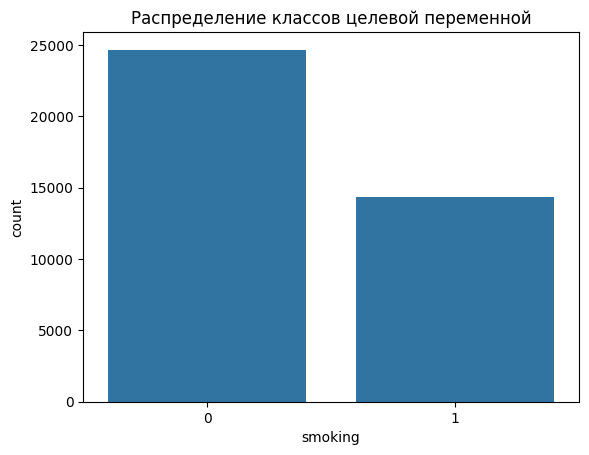

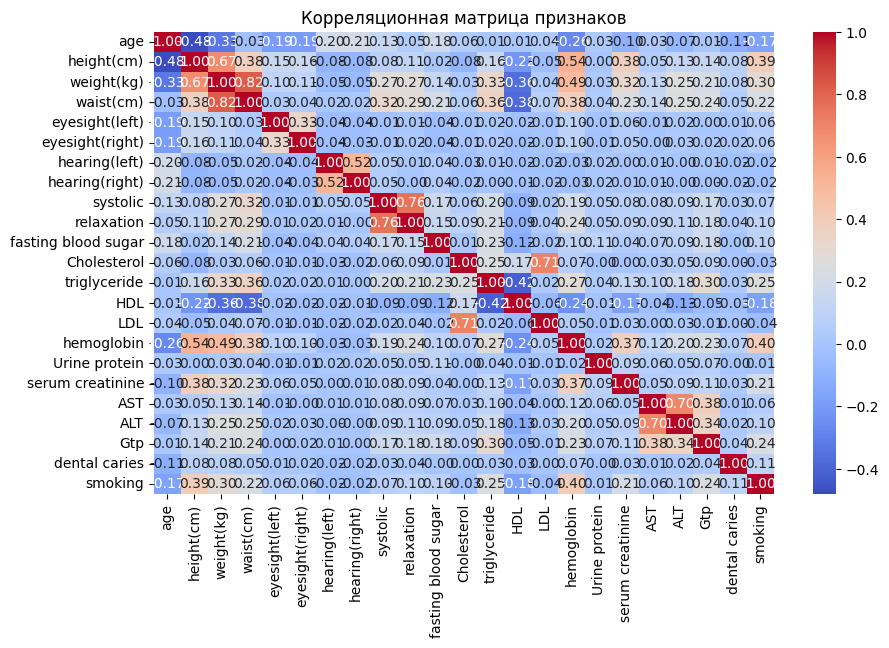

In [5]:
# 3. Визуализация данных
# Гистограмма распределения целевой переменной
sns.countplot(x=df_train["smoking"])
plt.title("Распределение классов целевой переменной")
plt.show()

# Корреляционная матрица
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()

In [6]:
# 4. Подготовка данных
# Удаляем пропуски (если есть)
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

# Разделяем данные на X и y
X = df_train.drop(columns=["smoking"])
y = df_train["smoking"]

# Разбиваем на обучающую и тестовую выборку
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [7]:
# 5. Обучение модели SVM
# Выбираем SVM с RBF-ядром и оптимальным параметром C
svc = SVC(kernel='rbf', C=1.0, probability=True)
svc.fit(X_train_scaled, y_train)

SVC(probability=True)

In [8]:
# 6. Оценка качества модели
# Предсказания
y_pred = svc.predict(X_val_scaled)
y_prob = svc.predict_proba(X_val_scaled)[:, 1]

# Метрики
conf_matrix = confusion_matrix(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)

# Вывод результатов
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Выводим ответы на вопросы
print("\nВыбранное значение C: 1.0 (стандартное значение, обеспечивающее баланс между сложностью модели и обобщающей способностью)")
print("Выбранное ядро: RBF (оно хорошо работает с нелинейными разделимыми данными)")
print("Алгоритм показывает высокую точность и хорошие метрики, что свидетельствует о его надежности в данной задаче")

Confusion Matrix:
[[4020  955]
 [ 955 1867]]
Accuracy: 0.76
Precision: 0.66
Recall: 0.66
F1 Score: 0.66
ROC AUC Score: 0.83

Выбранное значение C: 1.0 (стандартное значение, обеспечивающее баланс между сложностью модели и обобщающей способностью)
Выбранное ядро: RBF (оно хорошо работает с нелинейными разделимыми данными)
Алгоритм показывает высокую точность и хорошие метрики, что свидетельствует о его надежности в данной задаче
